In [32]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(42)
np.random.seed(8)

In [33]:
X = np.array([[0,0,1],
              [1,0,1],
              [1,1,1],
              [2,1,1],
              [2,2,1]])

#y = np.array([0,1,2,5,6])
y = np.array([0,1,2,3,4])
eta = .10
q = 2 # number of hidden nodes

# the rows of W1 correspond to the columns of X/Phi, the columns to the number of hidden nodes
# the rows of W2 correspond to the number of hidden nodes, the columns to the dimension of the output y
W1 = np.random.randn(3,q)
W2 = np.random.randn(q,1)

In [34]:
# uses the ReLU activation function for h and the linear activation function for the output
def f(x):
    h = np.maximum(0, W1.T.dot(x))
    return W2.T.dot(h)

In [35]:
# keep track of gradient descent errors
# to monitor convergence
errors = []
epochs = 400
n = X.shape[0]
for epoch in range(epochs):
    dW2 = 0
    for i, j in enumerate(y):
        x = np.reshape(X[i], (3,1))
        h = np.maximum(0, W1.T.dot(x))
        dW2 += (2/n) * (f(x) - y[i])*h
  
    # note: it's actually more stable to make this update after calculating dW1
    # but, this asynchronous update is usually fine for simple problems
    W2 = W2 - eta * dW2
    
    dW1 = 0
    for i, j in enumerate(y):
        x = np.reshape(X[i], (3,1))
        h = np.maximum(0, W1.T.dot(x))
        mat1 = np.heaviside(h, 0)

        dW1 += (2/n) * (f(x) - y[i]) * np.kron(x, (W2 * mat1).T)

    W1 = W1 - eta * dW1
    e = (1/n) * np.sum(np.square(f(X.T) - y))
    errors.append(e)

In [36]:
print(f(X.T))

[[0.         0.99896644 1.99382084 3.00489446 3.99974886]]


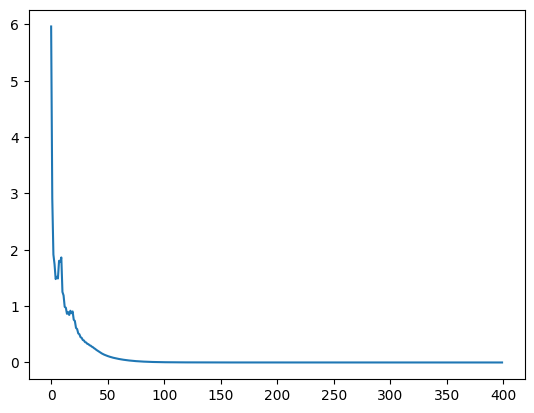

In [37]:
plt.plot(range(epochs), errors, label='line')
plt.show()

In [7]:
print(W1)
print(W2)

[[ 0.74525089 -0.04942007]
 [ 0.47171022  1.45332186]
 [-0.00164771 -0.14433276]]
[[1.362418  ]
 [0.26232714]]


In [8]:
# Solution to final practice way below
# Hopefully you did it yourself first
# Why cheat when the point is to learn???

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
#np.random.seed(8)

In [9]:
X = np.array([[-1,1],
              [0,1],
              [1,1]])

y = np.array([3,0,-1])
eta = 0.01

# the rows of W1 correspond to the columns of X, the columns to the number of hidden nodes
# the rows of W2 correspond to the number of hidden nodes, the columns to the dimension of the output y
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,1)

In [10]:
# uses the ReLU activation function for h and the linear activation function for the output
def f(x):
    h = np.maximum(0, W1.T.dot(x))
    return W2.T.dot(h)

In [11]:
# keep track of gradient descent errors
# to monitor convergence
errors = []
epochs = 400
n = X.shape[0]
d = X.shape[1]
for epoch in range(epochs):
    dW2 = 0
    for i, j in enumerate(y):
        x = np.reshape(X[i], (d,1))
        h = np.maximum(0, W1.T.dot(x))
        dW2 += (2/n) * (f(x) - y[i])*h

    W2 = W2 - eta * dW2
    
    dW1 = 0
    for i, j in enumerate(y):
        x = np.reshape(X[i], (d,1))
        h = np.maximum(0, W1.T.dot(x))
        mat1 = np.heaviside(h, 0)

        dW1 += (2/n) * (f(x) - y[i]) * np.kron(x, (W2 * mat1).T)

    W1 = W1 - eta * dW1
    e = (1/n) * np.sum(np.square(f(X.T) - y))
    errors.append(e)

In [12]:
print(f(X.T))

[[ 2.6666666   0.66666668 -1.33333325]]


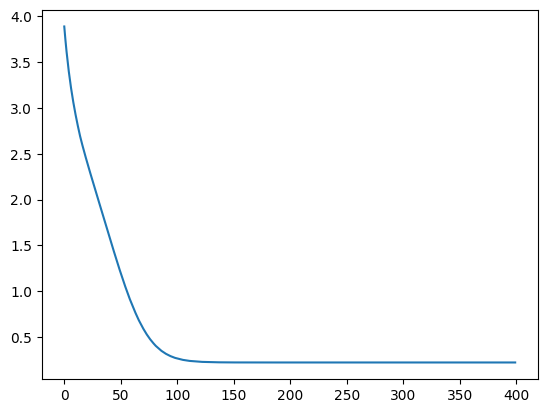

In [13]:
plt.plot(range(epochs), errors, label='line')
plt.show()

In [14]:
print(W1)
print(W2)

[[ 0.94272525 -0.93068594]
 [ 0.94500171  1.58998187]]
[[-1.07613911]
 [ 1.05889256]]


In [16]:
from sklearn.neural_network import MLPRegressor
# check out the documentation before using: https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPRegressor.html
regr = MLPRegressor(hidden_layer_sizes=(2,), activation='relu', learning_rate_init=0.01, max_iter=400, random_state=12).fit(X, y)
print(regr.predict(X))

[ 2.5987896   0.64189302 -1.31500355]


In [17]:
# return the weights
regr.coefs_

[array([[-9.85026511e-05,  1.06390255e+00],
        [ 4.34578293e-07,  6.04338035e-02]]),
 array([[ 0.01545482],
        [-1.83935698]])]